# Raster analysis

1. Write a function that plots the projected total and urban population from 2010 to 2100 for a selected country as a line chart. The attached countries.tif contains the country ID for each cell; [this list](https://en.wikipedia.org/wiki/ISO_3166-1_numeric) shows which ID is which country.

2. Generate a global raster that shows only the cells that are projected to lose population, and indicates how much the population in those cells is projected to decline between 2010 and 2100.

- Import libraries for raster analysis 

In [1]:
import rasterio
import bokeh
import urllib.request
import zipfile
import os
import glob
import numpy as np

# Subtask 1

- Input projected total and urban population from 2010 to 2100
- Use the method provided [here](https://www.quora.com/How-can-I-read-multiple-images-in-Python-presented-in-a-folder) to read multi tif files in certain folder and creat lists data.total & data.urban 

In [2]:
in_directory_total = r'SSP4-Total' 
files_to_process_total = glob.glob(os.path.join(in_directory_total, '*.tif'))
data_total=[]
for data_path_total in files_to_process_total:
    raster_data_total = rasterio.open(data_path_total)
    data_total.append(raster_data_total)
    
in_directory_urban = r'SSP4-Urban'
files_to_process_urban = glob.glob(os.path.join(in_directory_urban, '*.tif'))
data_urban=[]
for data_path_urban in files_to_process_urban:
    raster_data_urban = rasterio.open(data_path_urban)
    data_urban.append(raster_data_urban)
    
countries_tif = rasterio.open('countries.tif')

- Calculate the total and urban populations of Bulgaria (code = 100)
- Save corresponding populations into lists pop_total_Coun & pop_urban_Coun

In [3]:
countries = countries_tif.read(1)
pop_total_Coun=[]
pop_urban_Coun=[]

for i in range(0,len(data_total)):
    pop_total = data_total[i].read(1)
    pop_total[pop_total < 0] = 0
    pop_urban = data_urban[i].read(1)
    pop_urban[pop_urban < 0] = 0
    Coun = countries == 100
    pop_total_Coun.append(np.sum(pop_total[Coun])/1000000)
    pop_urban_Coun.append(np.sum(pop_urban[Coun])/1000000)

- Plot the line chart

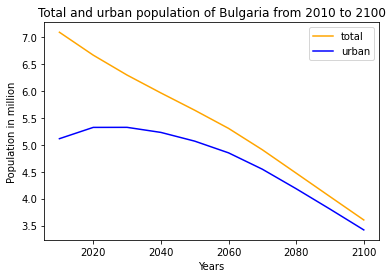

In [4]:
import matplotlib as mlp
import matplotlib.pyplot as plt
time = []
for i in range(0,len(data_total)):
    time.append(2000+10*(i+1))
    
total_line, = plt.plot(time, pop_total_Coun, color='orange')
urban_line, = plt.plot(time, pop_urban_Coun, color='blue')
plt.legend([total_line, urban_line], ['total', 'urban'])
plt.xlabel('Years')
plt.ylabel('Population in million')
plt.title('Total and urban population of Bulgaria from 2010 to 2100')
plt.show()        

# Subtask 2

Text(0.5, 0.98, 'The Population projected to decline from 2010 to 2100')

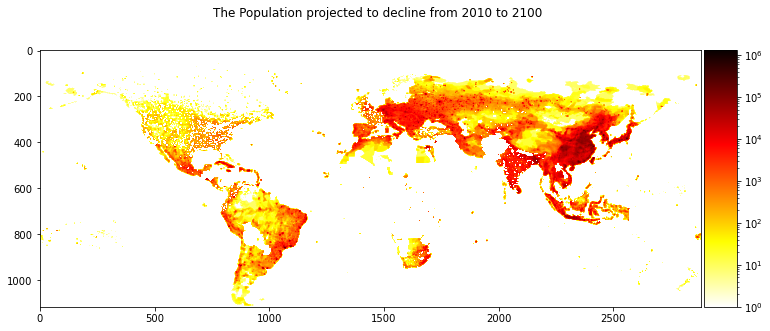

In [5]:
from matplotlib.colors import LogNorm
from rasterio.plot import show
from mpl_toolkits.axes_grid1 import make_axes_locatable

pop_dif = data_total[0].read(1)-data_total[9].read(1) # pop_dif > 0: decline, pop_dif < 0: rise

fig_pop_dec = plt.figure(figsize=(12.5, 5))
rig = fig_pop_dec.add_subplot(1, 1, 1)
fig_rig = rig.imshow(pop_dif, norm=LogNorm(), cmap='hot_r') 

divider = make_axes_locatable(rig)
cax = divider.append_axes("right", size="5%", pad=0.05) # set the size and position of colorbar

plt.colorbar(fig_rig, cax=cax)
plt.suptitle('The Population projected to decline from 2010 to 2100')


# Spatial autocorrelation
1. Download a [shapefile of the world](https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip) from naturalearthdata.com and perform a [left join](https://chrisalbon.com/python/data_wrangling/pandas_join_merge_dataframe/) with the attached under5mortality.csv , which contains child mortality rates for each country in the world. The join should be done on the ISO_A3 column in the shapefile and the ISO column in the CSV, respectively.
2. Calculate the spatial weights matrix for the world based on border neighborhood and use the weights to calculate Moran's I for child mortality.

# Subtask 1

In [6]:
from io import BytesIO
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_countries.zip'
with urlopen(zipurl) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall('Data2')

- Open our shapefile using geopandas

In [7]:
# Import necessary modules 
import geopandas as gpd 
import os

#Set filepath 
fp1 = "Data2/ne_110m_admin_0_countries.shp" 
fp2 = "under5mortality.csv" 

# Read file using gpd.read_file() 
data1_shp = gpd.read_file(fp1)
data2_csv = gpd.read_file(fp2)

# Print columns 
print(data1_shp.columns)
print(data2_csv.columns)


Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'ADMIN', 'ADM0_A3', 'GEOU_DIF', 'GEOUNIT',
       'GU_A3', 'SU_DIF', 'SUBUNIT', 'SU_A3', 'BRK_DIFF', 'NAME', 'NAME_LONG',
       'BRK_A3', 'BRK_NAME', 'BRK_GROUP', 'ABBREV', 'POSTAL', 'FORMAL_EN',
       'FORMAL_FR', 'NAME_CIAWF', 'NOTE_ADM0', 'NOTE_BRK', 'NAME_SORT',
       'NAME_ALT', 'MAPCOLOR7', 'MAPCOLOR8', 'MAPCOLOR9', 'MAPCOLOR13',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'WIKIPEDIA', 'FIPS_10_', 'ISO_A2',
       'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'WOE_ID',
       'WOE_ID_EH', 'WOE_NOTE', 'ADM0_A3_IS', 'ADM0_A3_US', 'ADM0_A3_UN',
       'ADM0_A3_WB', 'CONTINENT', 'REGION_UN', 'SUBREGION', 'REGION_WB',
       'NAME_LEN', 'LONG_LEN', 'ABBREV_LEN', 'TINY', 'HOMEPART', 'MIN_ZOOM',
       'MIN_LABEL', 'MAX_LABEL', 'NE_ID', 'WIKIDATAID', 'NAME_AR', 'NAME_BN',
       'NAME_DE', 'NAME_

- Left join

In [8]:
import pandas as pd
data2_csv.rename(columns={"ISO": "ISO_A3"}, inplace=True) # for left join, rename the ISO column in the CSV 
mor_cal=pd.merge(data1_shp, data2_csv, on='ISO_A3', how='left') # left join
mor_cal

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry_x,field_1,Name,ChildMortality,geometry_y
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",181,Fiji,25.3,None
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",559,United Republic of Tanzania,54.0,None
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,None
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",97,Canada,5.1,None
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",562,United States,6.6,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,Admin-0 country,1,5,Republic of Serbia,SRB,0,2,Sovereign country,Republic of Serbia,SRB,...,Сербия,Serbien,Sırbistan,Serbia,塞尔维亚,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",460,Serbia,5.7,None
173,Admin-0 country,1,6,Montenegro,MNE,0,2,Sovereign country,Montenegro,MNE,...,Черногория,Montenegro,Karadağ,Montenegro,蒙特內哥羅,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",346,Montenegro,3.5,None
174,Admin-0 country,1,6,Kosovo,KOS,0,2,Sovereign country,Kosovo,KOS,...,Республика Косово,Kosovo,Kosova,Kosovo,科索沃,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",NaN,NaN,NaN,None
175,Admin-0 country,1,5,Trinidad and Tobago,TTO,0,2,Sovereign country,Trinidad and Tobago,TTO,...,Тринидад и Тобаго,Trinidad och Tobago,Trinidad ve Tobago,Trinidad và Tobago,千里達及托巴哥,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",532,Trinidad and Tobago,26.1,None


In [9]:
data2_csv.rename(columns={"ISO_A3": "ISO"}, inplace=True) # change the column name in CSV back 
data1_shp.rename(columns={"ISO_A3": "ISO"}, inplace=True) # for left join, rename the ISO_A3 column in the shapefile
pd.merge(data2_csv, data1_shp, on='ISO', how='left') # left join

,field_1,ISO,Name,ChildMortality,geometry_x,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry_y
0,1,AFG,Afghanistan,67.9,None,Admin-0 country,1.0,3.0,Afghanistan,AFG,...,아프가니스탄,Afghanistan,Afganistan,Afeganistão,Афганистан,Afghanistan,Afganistan,Afghanistan,阿富汗,"POLYGON ((66.51861 37.36278, 67.07578 37.35614..."
1,4,ALB,Albania,8.8,None,Admin-0 country,1.0,6.0,Albania,ALB,...,알바니아,Albanië,Albania,Albânia,Албания,Albanien,Arnavutluk,Albania,阿尔巴尼亚,"POLYGON ((21.02004 40.84273, 20.99999 40.58000..."
2,7,DZA,Algeria,24.0,None,Admin-0 country,1.0,3.0,Algeria,DZA,...,알제리,Algerije,Algieria,Argélia,Алжир,Algeriet,Cezayir,Algérie,阿尔及利亚,"POLYGON ((-8.68440 27.39574, -8.66512 27.58948..."
3,10,AND,Andorra,3.3,None,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
4,13,AGO,Angola,81.1,None,Admin-0 country,1.0,3.0,Angola,AGO,...,앙골라,Angola,Angola,Angola,Ангола,Angola,Angola,Angola,安哥拉,"MULTIPOLYGON (((12.99552 -4.78110, 12.63161 -4..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,574,VEN,Venezuela (Bolivarian Republic of)**,30.9,None,Admin-0 country,1.0,3.0,Venezuela,VEN,...,베네수엘라,Venezuela,Wenezuela,Venezuela,Венесуэла,Venezuela,Venezuela,Venezuela,委內瑞拉,"POLYGON ((-60.73357 5.20028, -60.60118 4.91810..."
192,577,VNM,Viet Nam,20.9,None,Admin-0 country,1.0,2.0,Vietnam,VNM,...,베트남,Vietnam,Wietnam,Vietname,Вьетнам,Vietnam,Vietnam,Việt Nam,越南,"POLYGON ((104.33433 10.48654, 105.19991 10.889..."
193,580,YEM,Yemen,55.4,None,Admin-0 country,1.0,3.0,Yemen,YEM,...,예멘,Jemen,Jemen,Iémen,Йемен,Jemen,Yemen,Yemen,也门,"POLYGON ((52.00001 19.00000, 52.78218 17.34974..."
194,583,ZMB,Zambia,60.0,None,Admin-0 country,1.0,3.0,Zambia,ZMB,...,잠비아,Zambia,Zambia,Zâmbia,Замбия,Zambia,Zambiya,Zambia,赞比亚,"POLYGON ((30.74001 -8.34001, 31.15775 -8.59458..."


# Subtask 2

- Import necessary libraries and functions

In [10]:
import libpysal
from libpysal.weights import Rook
from libpysal.weights import KNN
from pysal.explore import esda

- Rook contiguity weights is calculated based on border neighborhood

C:\Users\YunYu\anaconda3\envs\geoanalysis\lib\site-packages\libpysal\weights\weights.py:167: UserWarning: The weights matrix is not fully connected: 
 There are 25 disconnected components.
 There are 21 islands with ids: 0, 19, 20, 22, 23, 45, 46, 47, 78, 89, 134, 135, 136, 137, 138, 140, 144, 147, 155, 159, 175.
  warnings.warn(message)


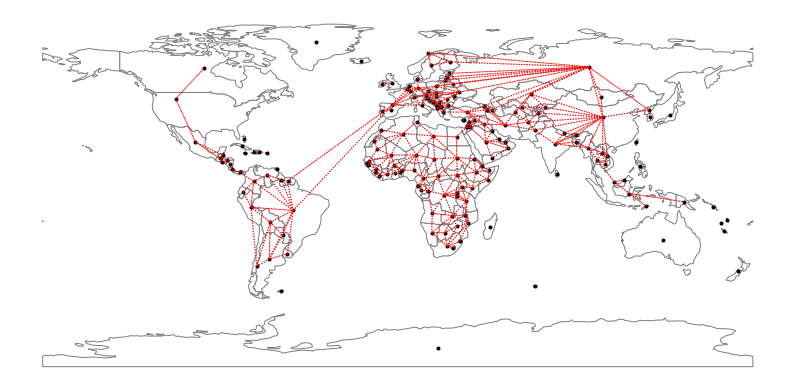

In [11]:
mor_cal.rename(columns={"geometry_x": "geometry"}, inplace=True)
w_rook =Rook.from_dataframe(mor_cal)

ax = mor_cal.plot(edgecolor='grey', facecolor='w',figsize=(14, 14))
f,ax = w_rook.plot(mor_cal, ax=ax, 
        edge_kws=dict(color='r', linestyle=':', linewidth=1),
        node_kws=dict(marker='.'))
ax.set_axis_off()

- Using Rook weights, there are 25 disconnected components

In [12]:
mor_cal['ChildMortality'].fillna(0, inplace=True) # replace NAN with zero
mor_cal['ChildMortality'] = mor_cal['ChildMortality'].apply(pd.to_numeric) # change the dtype of series 
moran = esda.Moran(mor_cal['ChildMortality'], w_rook) # calculate Moran's I for child mortality
moran.I

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 19, ' is an island (no neighbors)')
('WARNING: ', 20, ' is an island (no neighbors)')
('WARNING: ', 22, ' is an island (no neighbors)')
('WARNING: ', 23, ' is an island (no neighbors)')
('WARNING: ', 45, ' is an island (no neighbors)')
('WARNING: ', 46, ' is an island (no neighbors)')
('WARNING: ', 47, ' is an island (no neighbors)')
('WARNING: ', 78, ' is an island (no neighbors)')
('WARNING: ', 89, ' is an island (no neighbors)')
('WARNING: ', 134, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')
('WARNING: ', 136, ' is an island (no neighbors)')
('WARNING: ', 137, ' is an island (no neighbors)')
('WARNING: ', 138, ' is an island (no neighbors)')
('WARNING: ', 140, ' is an island (no neighbors)')
('WARNING: ', 144, ' is an island (no neighbors)')
('WARNING: ', 147, ' is an island (no neighbors)')
('WARNING: ', 155, ' is an island (no neighbors)')
('WARNING: ', 159, ' is an island (no neig

0.7097112128817024